# Pair of categorical variables description: Heatmap

Pair of categorical variables description with a plot for one or several columns in a dataframe. 

In [1]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## data

In [84]:
""" tips """

# load data
tips = sns.load_dataset("tips")
# get categorical columns
cats = ['object', 'category', 'bool', 'datetime64[ns]']
cols_cat_tips = tips.select_dtypes(include=cats).columns.tolist()


""" titanic """

# load data
titanic = sns.load_dataset('titanic')
# get categorical columns
cats = ['object', 'category', 'bool', 'datetime64[ns]']
cols_cat_titanic = titanic.select_dtypes(include=cats).columns.tolist()


""" weather """

# load data
path = 'https://raw.githubusercontent.com/jmquintana79/utilsDS/master/scripts/datasets/data/dataset.weather.csv.gz'
weather = pd.read_csv(path)
weather['datetime'] = pd.to_datetime(weather['datetime'])
# get categorical columns
cats = ['object', 'category', 'bool']
cols_cat_weater = weather.select_dtypes(include=cats).columns.tolist()

In [102]:
## plot distribution of two categorical columns
def dist2cat(df:pd.DataFrame, columns:list, ax:"matplotlib axis")->"matplotlib axis":
    # validations
    assert len(columns) == 2, "it is required a pair of columns."
    for c in columns:
        assert c in df.columns.tolist(), f"column '{c}' is not available."
    # collect columns
    column1, column2 = columns
    # collect data
    temp = df[[column1, column2]].copy()
    # add counter
    temp["num"] = np.ones(len(temp), dtype= int)
    # count categories and get pivot table
    tempp = temp.groupby([column1, column2], as_index = False)[["num"]].sum().pivot(column1, column2, "num")
    # estimate percent
    tempp = tempp *  100. / tempp.sum().sum()   
    # display or not annotation
    if np.prod(tempp.shape) > 50:
        is_annotate = False
    else:
        is_annotate = True
    # plot
    ax = sns.heatmap(tempp, annot = is_annotate, fmt = ".2f", cmap = "YlGnBu", ax = ax, cbar_kws={"label": "%"})  
    # return axis
    return ax

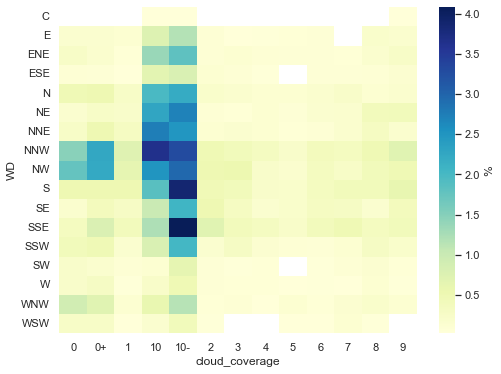

In [103]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,6))
dist2cat(weather, cols_cat_weater, ax = ax)
plt.show()

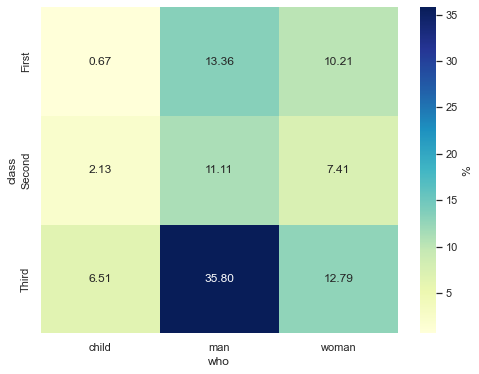

In [104]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8,6))
dist2cat(titanic, cols_cat_titanic[2:4], ax = ax)
plt.show()

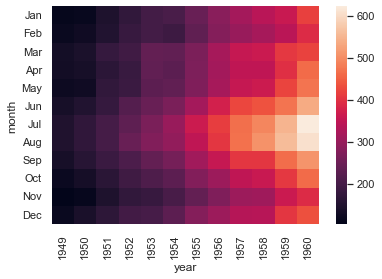

In [6]:


flights = flights.pivot("month", "year", "passengers")

ax = sns.heatmap(flights)